In [1]:
from scipy import *
from scipy.signal import *
from matplotlib.pyplot import *
import numpy as np

#### Construct periodic sample data

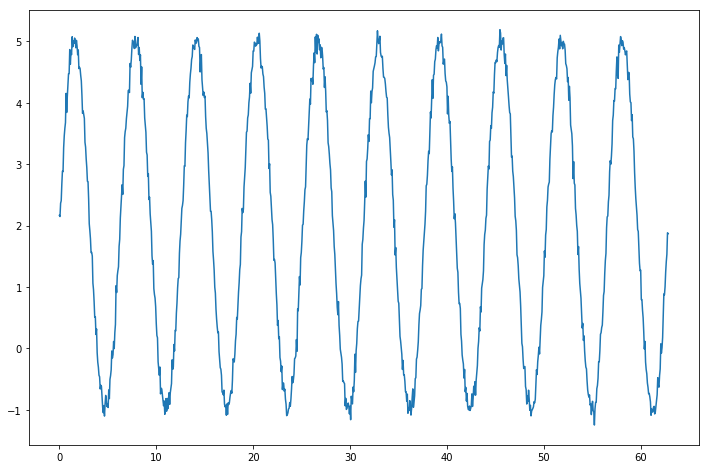

In [2]:
# The number of points in the time series. 
n = 1000
n_plot = 500

x = np.linspace(0, 20 * np.pi, 1000)
y = 2 + 3 * np.sin(x) + np.random.normal(0, 0.1, 1000)

figure(figsize=(12, 8))
plot(x, y)

#### Calculate the autocorrelation function

* Here, N is the number of points in the data set. 
* The formula follows the mathematical convention to start indexing sequences at 1, rather than the programming convention to start indexing at 0. 
* Notice that we have subtracted the overall average μ from all values and that the denominator is simply the expression of the numerator for lag k = 0.
<img src="figs/auto_correlation.png" alt="Drawing" style="height: 120px;"/>
* Initially, the two signals are perfectly aligned and the correlation is 1. 
* Then, as we shift the signals against each other, they slowly move out of phase with each other, and the correlation drops.
* How quickly it drops tells us how much “memory” there is in the data.

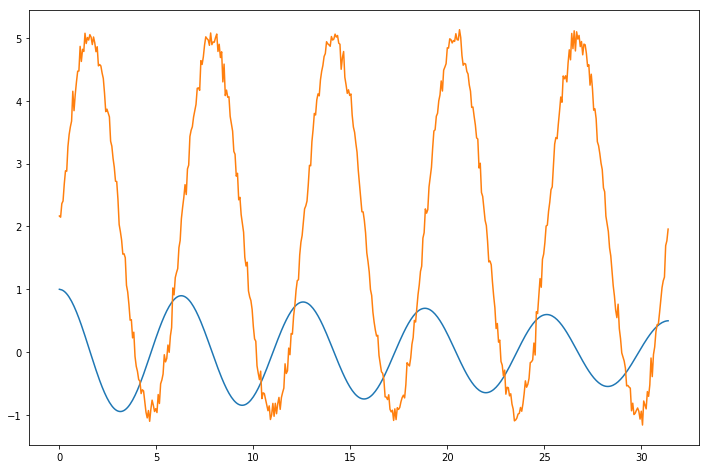

In [3]:
# de-mean
tmp = y - mean(y)

# calculate auto-correlation
offset = concatenate((tmp, zeros_like(tmp)))
corr = []
for k in range(n):
    corr.append(sum(tmp[:n - k] * offset[k:n]))

denom = sum(tmp**2)
corr /= denom

figure(2, figsize=(12, 8))
plot(x[:n_plot], corr[:n_plot])
plot(x[:n_plot], y[:n_plot])

#### Use scipy for autocorrelation

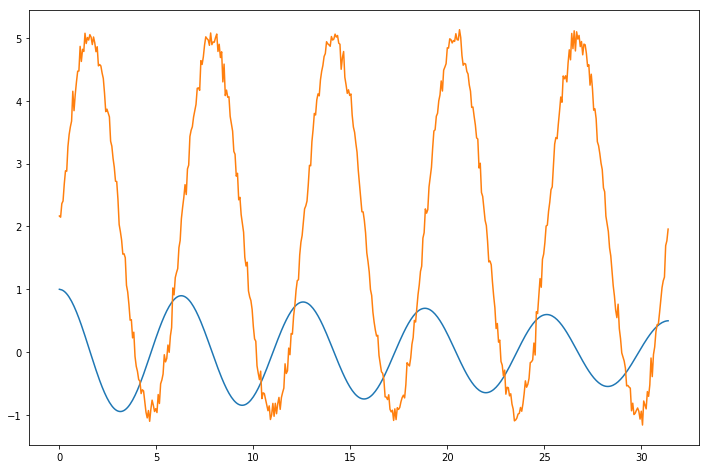

In [4]:
# de-mean
tmp = y - mean(y)

# Pad one copy of data on the right with zeros, then form correlation fct
# The function zeros_like(v) creates a vector with the same dimensions
# as the input vector v but with all elements zero.
corr = correlate(concatenate((tmp, zeros_like(tmp))), tmp, mode='valid')

# # Normalize by dividing by the first element
corr /= corr[0]

figure(2, figsize=(12, 8))
plot(x[:n_plot], corr[:n_plot])
plot(x[:n_plot], y[:n_plot])